In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import GifImagePlugin
import skyfield.api
import skyfield.almanac

In [2]:
img = Image.open('content_Longjiang2_Blink1100_2014-2019.gif')
img.seek(1)
before = np.asarray(img)
img.seek(0)
after = np.asarray(img)

In [3]:
diff = after.astype('float') - before.astype('float')

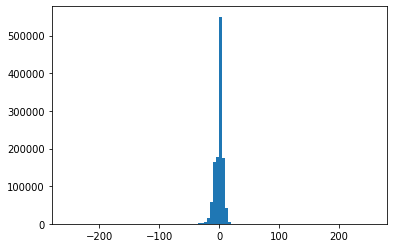

In [4]:
plt.hist(diff.ravel(), bins = 100);

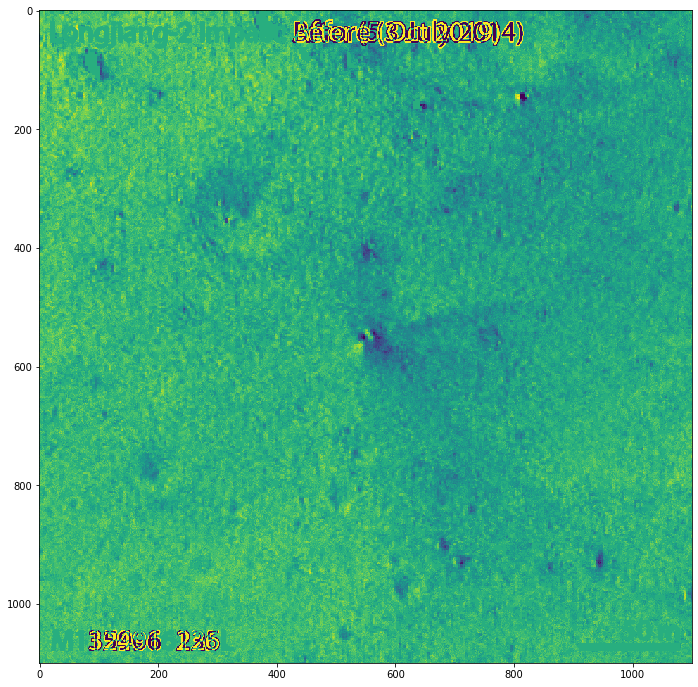

In [5]:
plt.figure(figsize = (12,12))
plt.imshow(diff, vmin = -50, vmax = 30)
plt.imsave('/tmp/dslwpb_impact_diff.png', diff, vmin = -50, vmax = 30)

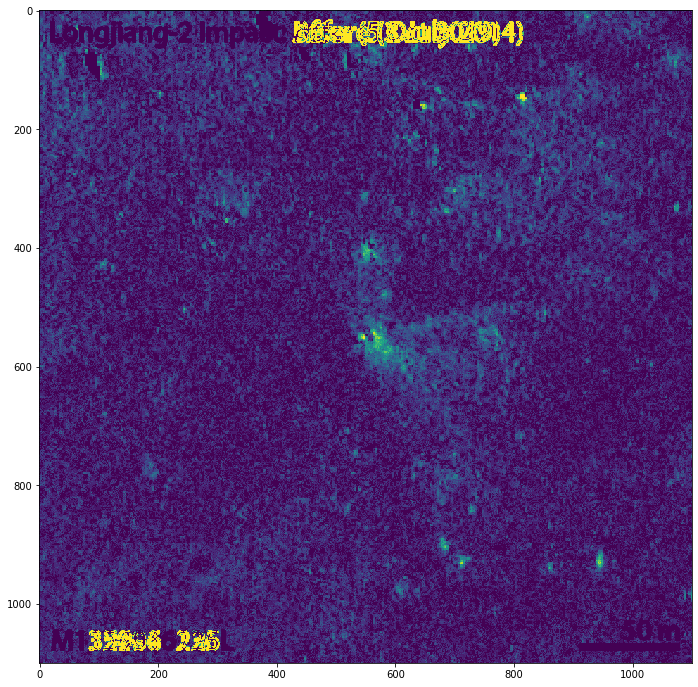

In [6]:
plt.figure(figsize = (12,12))
plt.imshow(np.abs(diff), vmin = 0, vmax = 50)
plt.imsave('/tmp/dslwpb_impact_diff_abs.png', np.abs(diff), vmin = 0, vmax = 50)

In [7]:
ts = skyfield.api.load.timescale()
e = skyfield.api.load('de421.bsp')
phase_angle = skyfield.almanac.phase_angle(e, 'MOON', ts.utc(2019, 10, 5))
phase_angle

<Angle 97deg 58' 36.4">

In [8]:
phase_angle_before = skyfield.almanac.phase_angle(e, 'MOON', ts.utc(2014, 7, 3))
phase_angle_before

<Angle 117deg 40' 57.7">

In [9]:
longitude = 159.5170
longitude - phase_angle.degrees

61.54021229760019